In [ ]:
from keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf

import numpy as np
import seaborn as sns
import pandas as pd

In [4]:
tf.__version__

'2.17.1'

In [5]:
%load_ext tensorboard

In [6]:
logdir = "logs"

In [7]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes = range(10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

/home/mat/miniconda3/envs/tf217/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1757606233.061080    2392 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1757606233.128711    2392 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1757606233.128771    2392 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1757606233.131155    2392 cu

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

model.fit(x=train_images,
          y=train_labels,
          epochs=5,
          validation_data=(test_images, test_labels))

Epoch 1/5


I0000 00:00:1757606236.279934    3274 service.cc:146] XLA service 0x7d2570005380 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1757606236.279979    3274 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1660 SUPER, Compute Capability 7.5
2025-09-11 12:57:16.331547: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-09-11 12:57:16.623521: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


  44/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3248 - loss: 1.9468

I0000 00:00:1757606240.964624    3274 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.9541 - loss: 0.1436 - val_accuracy: 0.9804 - val_loss: 0.0589
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9863 - loss: 0.0440 - val_accuracy: 0.9872 - val_loss: 0.0408
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9899 - loss: 0.0314 - val_accuracy: 0.9849 - val_loss: 0.0503
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9924 - loss: 0.0242 - val_accuracy: 0.9913 - val_loss: 0.0273
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9938 - loss: 0.0198 - val_accuracy: 0.9916 - val_loss: 0.0275


In [10]:
y_true = test_labels
y_pred = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [11]:
classes = range(10)

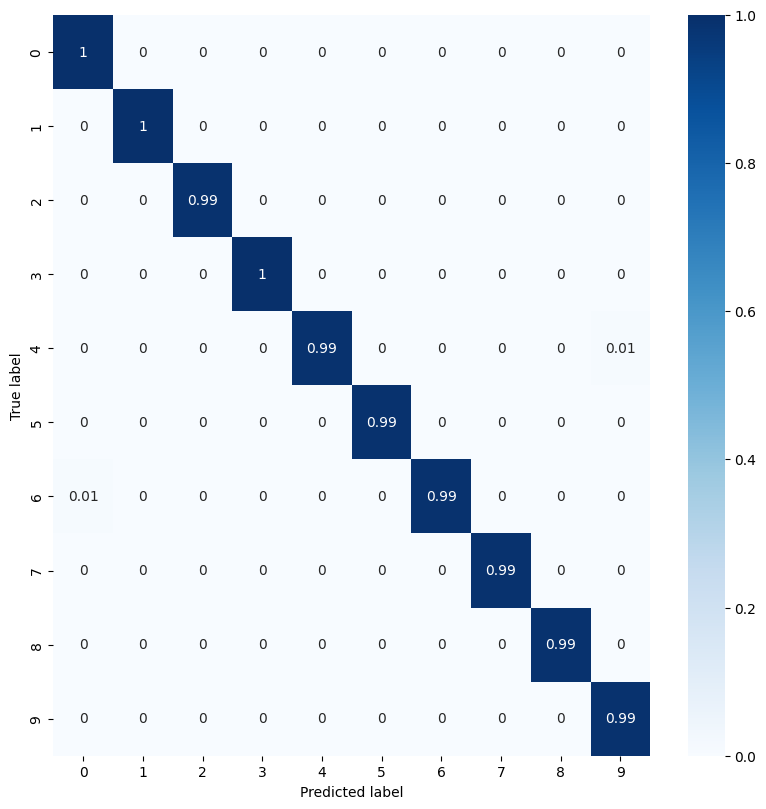

In [12]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred.argmax(axis=1)).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                            index = classes, 
                            columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [14]:
con_mat

array([[ 976,    0,    1,    0,    0,    0,    1,    1,    1,    0],
       [   0, 1131,    1,    1,    0,    0,    0,    2,    0,    0],
       [   3,    2, 1023,    0,    0,    0,    0,    4,    0,    0],
       [   0,    0,    1, 1007,    0,    2,    0,    0,    0,    0],
       [   0,    0,    0,    0,  973,    0,    0,    0,    0,    9],
       [   3,    0,    0,    4,    0,  881,    2,    1,    0,    1],
       [   8,    2,    0,    0,    1,    0,  947,    0,    0,    0],
       [   1,    3,    3,    0,    0,    0,    0, 1019,    1,    1],
       [   4,    1,    2,    1,    0,    0,    0,    0,  963,    3],
       [   1,    0,    0,    0,    3,    3,    0,    3,    3,  996]],
      dtype=int32)

In [ ]:
print(con_mat[2, 1])

2


In [17]:
vp = vn = fp = fn = 0

for i in range(10):
    diagonal = con_mat[i, i]
    
    vp += diagonal
    
    fn = np.sum(con_mat[i, :]) - diagonal
    
    fp = np.sum(con_mat[:, i]) - diagonal
    
    n_total_elementos = np.sum(con_mat)
    
    vn = n_total_elementos - vp - fp - fn

print("VP: ", vp)
print("VN: ", vn)
print("FP: ", fp)
print("FN: ", fn)


VP:  9916
VN:  57
FP:  14
FN:  13


In [ ]:
sensibilidade = vp / (vp + fn)
especificidade = vn / (fp + vn)
acuracia = (vp + vn) / n_total_elementos
precisao = vp / (vp + fp)
f_score = 2 * (precisao * sensibilidade) / (precisao + sensibilidade)

In [21]:
print(f"Sensibilidade: {sensibilidade:.2%}")
print(f"Especificidade: {especificidade:.2%}")
print(f"Acurácia: {acuracia:.2%}")
print(f"Precisão: {precisao:.2%}")
print(f"F-Score: {f_score:.2%}")

Sensibilidade: 99.87%
Especificidade: 80.28%
Acurácia: 99.73%
Precisão: 99.86%
F-Score: 99.86%
